In [498]:
#Import Librairies

import pandas as pd
import numpy as np
import os
import glob
import csv
#import Selenium for webscraping
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
sns.set(style= 'darkgrid')
sns.set_palette('deep')


#transformations
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score


In [499]:
#Read the dataset with the new column categories
#Load the books original dataset (reworked in excel and re-arranged the 5 lines that were to be shifted)
df = pd.read_csv(r"C:\Users\sophi\OneDrive\Bureau\python_project\file_4_prediction_csv.csv",sep=";")

In [500]:
#CLEANING THE DATASET

In [501]:
#Visualize the first 2 rows of the dataset
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,categories
0,27503,The Liberated Bride,A.B. Yehoshua/Hillel Halkin,3.77,156030160,9780156030168_,en-US,576,457,44,10/04/2004,Mariner Books,Fiction
1,30855,A Woman in Jerusalem,A.B. Yehoshua/Hillel Halkin,3.43,151012261,9780151012268_,en-US,256,851,132,8/14/2006,Houghton Mifflin Harcourt,Fiction


In [502]:

#Visualize the last 2 rows of the dataset
df.tail(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,categories
11074,38068,The Complete Stories,Zora Neale Hurston/Henry Louis Gates Jr./Siegl...,4.25,60921714,9780060921712_,eng,336,756,45,01/05/1996,Amistad,Short Stories
11075,26973,Their Eyes Were Watching God,Zora Neale Hurston/Ruby Dee,3.91,60776536,9780060776534_,en-US,7,421,99,11/23/2004,Caedmon,Classics


In [503]:
#show the null values of the dataset and count them and add the types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11076 non-null  int64  
 1   title               11076 non-null  object 
 2   authors             11076 non-null  object 
 3   average_rating      11076 non-null  float64
 4   isbn                11076 non-null  object 
 5   isbn13              11076 non-null  object 
 6   language_code       11076 non-null  object 
 7   num_pages           11076 non-null  int64  
 8   ratings_count       11076 non-null  int64  
 9   text_reviews_count  11076 non-null  int64  
 10  publication_date    11076 non-null  object 
 11  publisher           11076 non-null  object 
 12  categories          10679 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [504]:
# drop column isbn as isbn13 is more precise
df = df.drop(['isbn'], axis=1)

In [505]:
#sort the dataset by ratings_count and show the first 3 rows
df.sort_values(by=['ratings_count'], ascending=False).head(3)

,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,categories
9789,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,9780316015844_,eng,501,4597666,94265,09/06/2006,Little Brown and Company,Fiction
4342,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,9780618260300_,eng,366,2530894,32871,8/15/2002,Houghton Mifflin,Fantasy
4287,5107,The Catcher in the Rye,J.D. Salinger,3.80,9780316769174_,eng,277,2457092,43499,1/30/2001,Back Bay Books,Fiction


In [506]:
#remove duplicates title, authors, language_code, average_rating,num_pages keep first
df = df.drop_duplicates(subset=['title', 'authors', 'language_code', 'average_rating','num_pages'], keep='first') 

#print the number of dropped duplicates
print(len(df0)-len(df))

45


In [507]:
len(df)

11031

In [508]:
#show the number of null values in the categories column above the minimum of the ratings_count column
null_values_categories =df.loc[(df['ratings_count'] >df['ratings_count'].min() ) & (df['categories'].isna()),:].count()
len(null_values_categories)

12

In [509]:
#Since 12 rows have a ratings count superior to the ratings count mean, I drop the null values in categories column 
df = df.dropna(subset=['categories'])

In [510]:
#show the total number of rows
len(df)

10634

In [511]:
df1=df.copy()

#display the unique values of the dataset
df1.nunique()

bookID                10634
title                  9924
authors                6302
average_rating          201
isbn13                10634
language_code            25
num_pages               990
ratings_count          5217
text_reviews_count     1795
publication_date       3571
publisher              2152
categories              120
dtype: int64

In [512]:
# Find unique values of the column categories
print(df1['categories'].unique())

['Fiction' 'Biography' 'Nonfiction' 'Autobiography' 'Adult Fiction'
 'Classics' 'Politics' 'History' 'Poetry' 'Childrens' 'Science' 'Business'
 'Travel' 'Fantasy' 'Economics' 'Philosophy' 'Academic' 'Mystery'
 'Sequential Art' 'Cultural' 'Plays' 'Short Stories' 'Humor'
 'Architecture' 'Art' 'Music' 'Historical' 'Spirituality'
 'Science Fiction' 'Media Tie In' 'Horror' 'Literature' 'Writing' 'Crime'
 'Psychology' 'Self Help' 'Christianity' 'Dc Comics' 'American History'
 'Drama' 'LGBT' 'Food and Drink' 'Religion' 'Romance' 'Young Adult'
 'Paranormal' 'Culture' 'Humanities' 'Health' 'Computer Science' 'War'
 'Category Romance' 'Womens Fiction' 'Crafts' 'Christian' 'Law'
 'Parenting' 'Language' 'Holiday' 'Feminism' 'Thriller' 'Reference'
 'Education' 'Animals' 'Adventure' 'Marriage' 'World Of Warcraft' 'Sports'
 'Audiobook' 'Harlequin' 'Anthologies' 'Sports and Games' 'Design'
 'Westerns' 'Games' 'Occult' 'Leadership' 'Love' 'Productivity'
 'Sexuality' 'Environment' 'Textbooks' 'Couture' 

In [513]:
#Factorize the column categories to reduce the number of categories
df1['categories'] = df1['categories'].replace(['Comics','Manga', 'Games', 'Sports and Games','Young Adult', 'World Of Warcraft','Childrens','Dc Comics'],'comics, graphic and children')
df1['categories'] = df1['categories'].replace(['Fiction','Paranormal','Suspense','Adult Fiction','Literary Fiction','Fantasy','Humor', 'Dungeons and Dragons','Realistic Fiction','Gothic','Superheroes','suspense','Action','Womens Fiction','Science Fiction','Esoterica','Westerns','Harlequin'], 'Fiction, Fantasy and Paranormal')
df1['categories'] = df1['categories'].replace(['Autobiography','History','Historical','Humanities','American History','Biography','North American Hi...','Military History'], 'History, Autobiography and Biography')
df1['categories'] = df1['categories'].replace(['Romance','Erotica','Novels','Love','Marriage','Category Romance'], 'Romance')
df1['categories'] = df1['categories'].replace(['Aviation','Short Stories','Pulp','New York','Military','Urban','Military','Alcohol','Media Tie In','War','Language','Reference','Education','Animals','Teaching','Jewellery'],'Nonfiction')
df1['categories'] = df1['categories'].replace(['Poetry','Drama','Apocalyptic','Literature','Academic','Philosophy','Writing','European Literature','Asian Literature','Anthologies','Cultural','Plays'],'Classics')
df1['categories'] = df1['categories'].replace(['Sequential Art','Culture','Architecture','Art','Music','Crafts','Design'], 'Art, Music and Architecture')
df1['categories'] = df1['categories'].replace(['The Metamorphosis','Health','Pseudoscience','Sociology','Psychology','Computer Science','Anthropology','Space','Neurodiversity'],'Science')
df1['categories'] = df1['categories'].replace(['LGBT','Politics','Parenting','Sexuality','Criticism','Environment','Social Movements','Feminism'],'Politics and Society')
df1['categories'] = df1['categories'].replace(['Christian Fiction','Occult','Spirituality','Christianity','Christian','Gothic'],'Religion')
df1['categories'] = df1['categories'].replace(['Law','Role Playing Games','Economics','Self Help','Finance','Leadership','Productivity','Relationships','Business'], 'Business and Self Development')
df1['categories'] = df1['categories'].replace(['Travel','Food and Drink','Couture','Horticulture','Football','Holiday','Sports','Adventure'],'Travel, sports and leisures')
df1['categories'] = df1['categories'].replace(['Mystery','Thriller','Crime','Horror'],'Mystery, Thriller and Crime')
df1['categories'] = df1['categories'].replace(['Audiobook','Textbooks'], 'Others')

In [514]:
# Find unique values of the column categories after factorization
print(df1['categories'].unique())

['Fiction, Fantasy and Paranormal' 'History, Autobiography and Biography'
 'Nonfiction' 'Classics' 'Politics and Society'
 'comics, graphic and children' 'Science' 'Business and Self Development'
 'Travel, sports and leisures' 'Mystery, Thriller and Crime'
 'Art, Music and Architecture' 'Religion' 'Romance' 'Others']


In [515]:
#show the unique values of the column language_code
print(df1.language_code.unique().tolist())

['en-US', 'eng', 'spa', 'ger', 'fre', 'en-GB', 'grc', 'ita', 'mul', 'msa', 'por', 'en-CA', 'jpn', 'ale', 'lat', 'enm', 'zho', 'swe', 'gla', 'tur', 'nor', 'glg', 'rus', 'ara', 'nl']


In [516]:
#factorize the column language_code to reduce the number of languages
df1['language_code'] = df['language_code'].replace(['en-US','en-GB','en-CA','enm','en'],'eng')

In [517]:
#describe the dataset to see the mean, median, standard deviation, min, max, 25%, 50%, 75% of the dataset
df1.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
count,10634.000000,10634.000000,10634.000000,1.063400e+04,10634.000000
mean,21250.591311,3.942765,339.890070,1.837618e+04,555.177262
std,13075.775943,0.296355,242.024441,1.146025e+05,2621.194900
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10235.750000,3.780000,198.000000,1.242500e+02,10.000000
50%,20055.000000,3.960000,304.000000,8.160000e+02,50.000000
75%,31977.500000,4.130000,416.000000,5.303750e+03,248.750000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000


In [518]:
#replace the 0 values in the average rating column by the mean of the column
df1['average_rating'] = df1['average_rating'].replace(0,df1['average_rating'].mean())
#replace the 0 values in the num_pages column by the mean of the column
df1['num_pages'] = df1['num_pages'].replace(0,df1['num_pages'].mean())
#replace the 0 values in the text_reviews_count column by the mean of the column
df1['text_reviews_count'] = df1['text_reviews_count'].replace(0,df1['text_reviews_count'].mean())
#replace the 0 values in the ratings_count column by the mean of the column
df1['ratings_count'] = df1['ratings_count'].replace(0,df1['ratings_count'].mean())
#print the number of replaced 0 values
print(len(df1.loc[(df1['average_rating'] == 0) | (df1['num_pages'] == 0) | (df1['text_reviews_count'] == 0) | (df1['ratings_count'] == 0),:].count()))

12


In [519]:
#change the date format of the column publication_date and check if any null values are present
df1['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') # Convert data type of publication_date from object into date type
df1[df1['publication_date'].isnull()]


,bookID,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,categories
2739,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,9780553575101_,eng,718.0,10608.0,295.0,NaT,Bantam Books,"Mystery, Thriller and Crime"
2846,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,9782070323289_,fre,640.0,15.0,2.0,NaT,Folio histoire,"History, Autobiography and Biography"


In [520]:
#Since there are 2 null values in the column publication_date, I manually check on internet the publication date of the books and fill the null values
df1.loc[df1.bookID == 31373, 'publication_date'] = '2000-10-01 00:00:00'
df1.loc[df1.bookID == 45531, 'publication_date'] = '1985-10-01 00:00:00'

In [521]:
#Replace the date by the year only in the column publication_date and change the name of the column to publi_year
df1['publi_year'] = pd.DatetimeIndex(df1['publication_date']).year
#change the data type of the column publi_year from float to int
df1['publi_year'] = df1['publi_year'].astype(int)

In [522]:
#add a column age_book to the dataset to show the age of the book
df1['age_book'] = 2020 - df1['publi_year']

#I drop the column publication_date and bookID as they are not needed anymore
df1.drop(columns=['publication_date', 'bookID'], inplace=True)

In [523]:
#check data frame information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10634 entries, 0 to 11075
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10634 non-null  object 
 1   authors             10634 non-null  object 
 2   average_rating      10634 non-null  float64
 3   isbn13              10634 non-null  object 
 4   language_code       10634 non-null  object 
 5   num_pages           10634 non-null  float64
 6   ratings_count       10634 non-null  float64
 7   text_reviews_count  10634 non-null  float64
 8   publisher           10634 non-null  object 
 9   categories          10634 non-null  object 
 10  publi_year          10634 non-null  int32  
 11  age_book            10634 non-null  int32  
dtypes: float64(4), int32(2), object(6)
memory usage: 996.9+ KB


In [524]:
df1.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,publi_year,age_book
count,10634.000000,10634.000000,1.063400e+04,10634.000000,10634.000000,10634.000000
mean,3.944989,342.095488,1.845913e+04,580.080361,2000.171149,19.828851
std,0.281157,240.460591,1.145958e+05,2618.437616,8.248848,8.248848
min,2.000000,1.000000,1.000000e+00,1.000000,1900.000000,0.000000
25%,3.780000,200.000000,1.290000e+02,14.000000,1998.000000,15.000000
50%,3.960000,304.000000,8.405000e+02,66.000000,2003.000000,17.000000
75%,4.130000,416.000000,5.512750e+03,350.750000,2005.000000,22.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000,120.000000


In [525]:
#change categorical column for categories into dummy variables and add them to the dataset
cat_cols = df1['categories'].str.get_dummies()
df1 = (pd.concat([df1, cat_cols], axis=1))
df1.head(1)


,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,categories,...,"History, Autobiography and Biography","Mystery, Thriller and Crime",Nonfiction,Others,Politics and Society,Religion,Romance,Science,"Travel, sports and leisures","comics, graphic and children"
0,The Liberated Bride,A.B. Yehoshua/Hillel Halkin,3.77,9780156030168_,eng,576.0,457.0,44.0,Mariner Books,"Fiction, Fantasy and Paranormal",...,0,0,0,0,0,0,0,0,0,0


In [526]:
# Split the columns authors to create a column author and a column co-author as in the column authors the co-authors are not always real authors but rather sometimes the translator or designer of the book
# new data frame with split value columns
reshuffle = df1["authors"].str.split("/", n = 1, expand = True)
# making separate first name column from new data frame
df1["author"]= reshuffle[0]
# making separate last name column from new data frame
df1["co-authors"]= reshuffle[1]


#reorder the columns author at the 3rd column position
column_to_move = df1.pop("author")

# insert column with insert(location, column_name, column_value)

df1.insert(3, "author", column_to_move)

#drop the column authors as it is not needed anymore
df1.drop(["authors"], axis=1, inplace=True)

#drop the column co-authors as I assume that the co-authors (not always authors, but rather translator, designers...) do not have an impact on the average rating
df1.drop('co-authors', axis=1, inplace=True)

In [527]:
df1.describe(include=np.object).T # type: ignore

C:\Users\sophi\AppData\Local\Temp\ipykernel_148508\3257317727.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,count,unique,top,freq
title,10634,9924,The Iliad,9
author,10634,3944,William Shakespeare,88
isbn13,10634,10634,9780156030168_,1
language_code,10634,21,eng,10068
publisher,10634,2152,Vintage,314
categories,10634,14,"Fiction, Fantasy and Paranormal",3262


In [528]:
#count occurrences of each value in the column author with the size function
df1['author_occurrence']=df1.groupby('author').size().reset_index(name='author_occurrence')['author_occurrence']
#same for the column publisher with the size function
df1['publisher_occurrence']=df1.groupby('publisher').size().reset_index(name='publisher_occurrence')['publisher_occurrence']
print(df1['author_occurrence'].mean())
print(df1['publisher_occurrence'].mean())

2.7077244258872653
4.96563245823389


In [529]:
df1.head(2)

,title,average_rating,author,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,categories,...,Nonfiction,Others,Politics and Society,Religion,Romance,Science,"Travel, sports and leisures","comics, graphic and children",author_occurrence,publisher_occurrence
0,The Liberated Bride,3.77,A.B. Yehoshua,9780156030168_,eng,576.0,457.0,44.0,Mariner Books,"Fiction, Fantasy and Paranormal",...,0,0,0,0,0,0,0,0,2.0,1.0
1,A Woman in Jerusalem,3.43,A.B. Yehoshua,9780151012268_,eng,256.0,851.0,132.0,Houghton Mifflin Harcourt,"Fiction, Fantasy and Paranormal",...,0,0,0,0,0,0,0,0,1.0,1.0


In [530]:
#check the information of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10634 entries, 0 to 11075
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   title                                 10634 non-null  object 
 1   average_rating                        10634 non-null  float64
 2   author                                10634 non-null  object 
 3   isbn13                                10634 non-null  object 
 4   language_code                         10634 non-null  object 
 5   num_pages                             10634 non-null  float64
 6   ratings_count                         10634 non-null  float64
 7   text_reviews_count                    10634 non-null  float64
 8   publisher                             10634 non-null  object 
 9   categories                            10634 non-null  object 
 10  publi_year                            10634 non-null  int32  
 11  age_book       

In [531]:
#save dataset to csv file
df1.to_csv('books_file_cleaned.csv', index=False)

In [532]:
#ANALYSIS OF THE DATASET

Text(0.5, 1.0, 'Number of ratings and books publication per year')

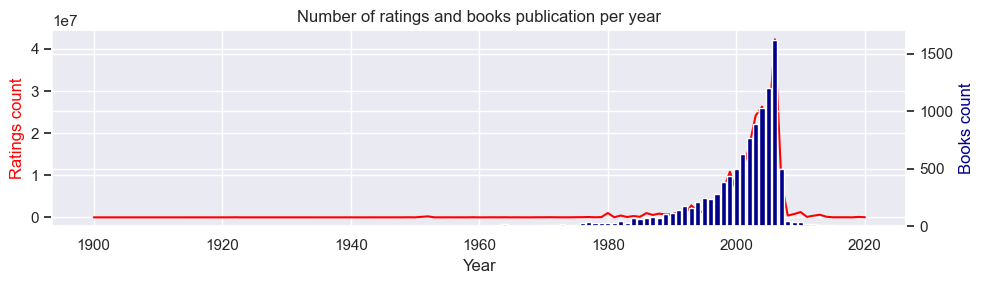

In [533]:

#group the ratings_count per year as a line plot and group the books counts per year as a bar plot
fig, ax1 = plt.subplots(figsize=(10, 3))
ax2 = ax1.twinx()
ax1.plot(df1.groupby('publi_year')['ratings_count'].sum(), color='red')
ax2.bar(df1.groupby('publi_year')['title'].count().index, df1.groupby('publi_year')['title'].count(), color='darkblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Ratings count', color='red')
ax2.set_ylabel('Books count', color='darkblue')
plt.title('Number of ratings and books publication per year')

Text(0, 0.5, 'Number of books')

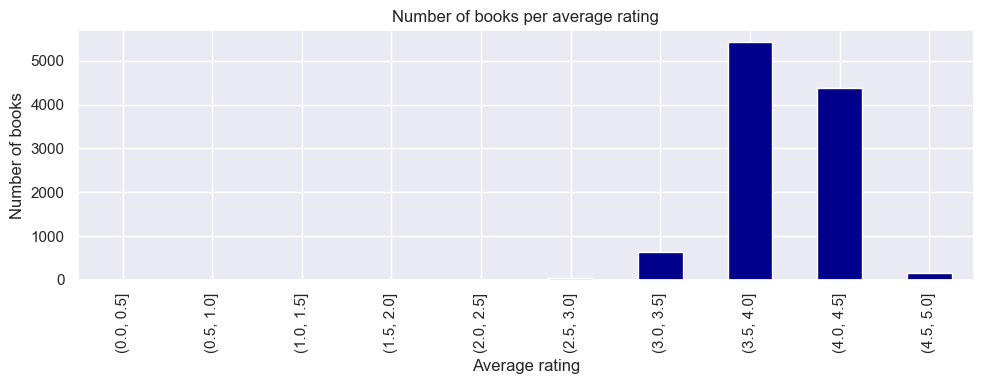

In [534]:
#group the number of books per average_rating with step of 0.5  as a bar chart and plot the result 
df1.groupby(pd.cut(df1['average_rating'], np.arange(0, 5.5, 0.5)))['title'].count().plot(kind='bar', figsize=(10, 4), color='darkblue')
#add title and labels to the chart
plt.title('Number of books per average rating')
plt.xlabel('Average rating')
plt.ylabel('Number of books')

Text(0, 0.5, 'Average age of the books')

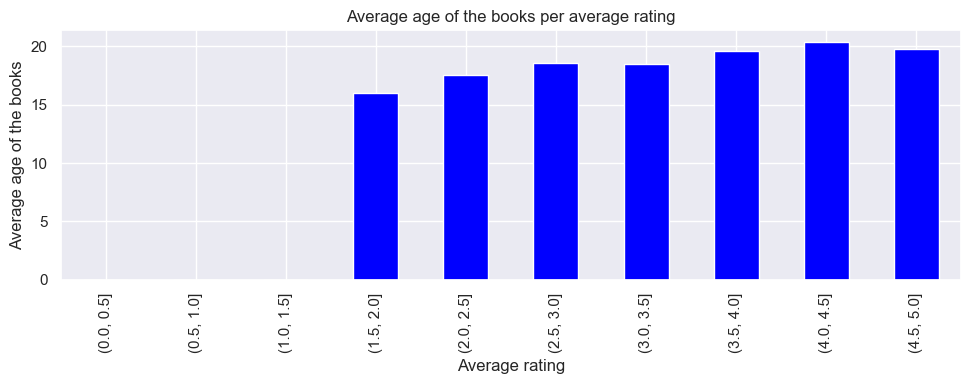

In [535]:

#group the age of the books per average_rating with step of 0.5  as a bar chart and plot th result 
df1.groupby(pd.cut(df1['average_rating'], np.arange(0, 5.5, 0.5)))['age_book'].mean().plot(kind='bar', figsize=(10, 4), color='blue')
#add title and labels to the chart
plt.title('Average age of the books per average rating')
plt.xlabel('Average rating')
plt.ylabel('Average age of the books')

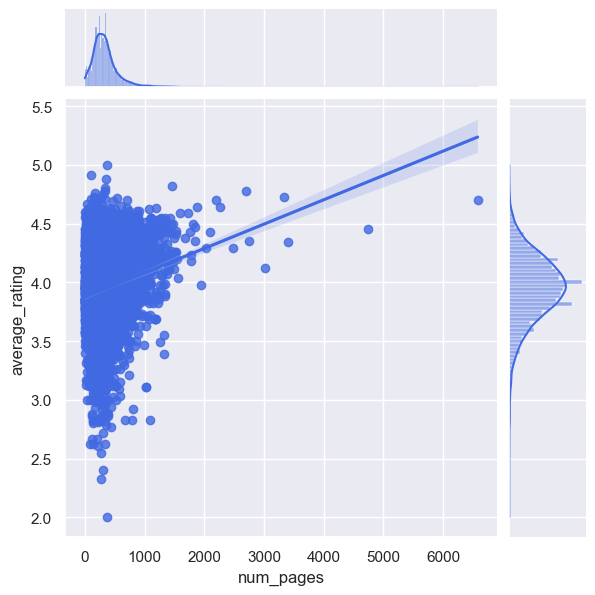

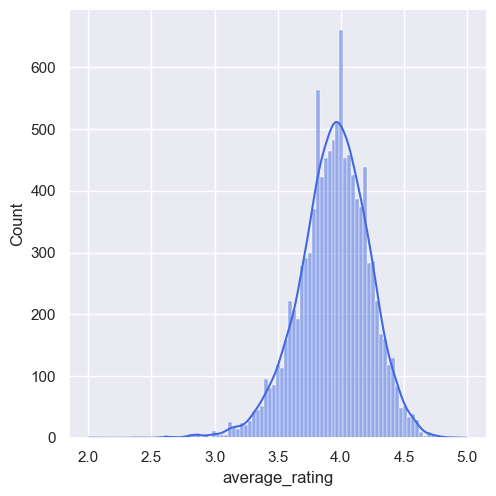

In [570]:

#show the correlation between the average rating and the number of pages and its distribution and plot the regression line
sns.jointplot(x='num_pages', y='average_rating', data=df1, kind='reg', color='royalblue')
#focus on the  average rating 
sns.displot(data=df1,x="average_rating", kde=True, color='royalblue')
sns.despine()

Text(0.5, 1.0, 'Top 10 most popular books by ratings_counts')

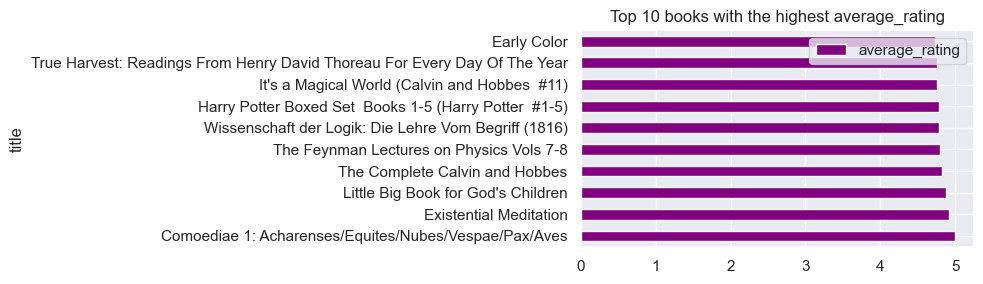

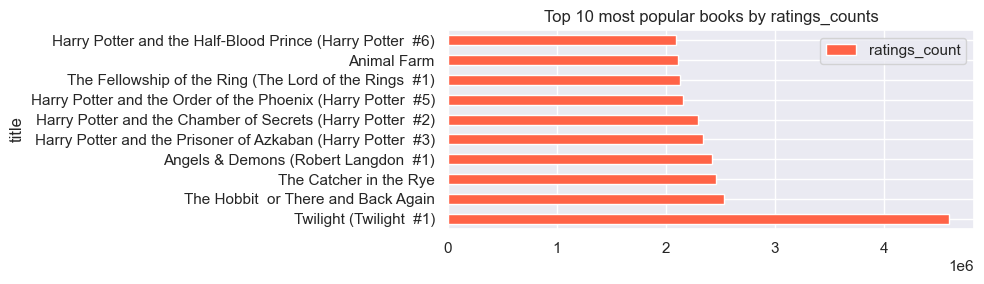

In [547]:
#show the top 10 books with the highest average_rating and plot the results in a horizontal bar chart
df1.sort_values(by='average_rating', ascending=False).head(10).plot(kind='barh', x='title', y='average_rating', figsize=(10,3), color='purple')
plt.title('Top 10 books with the highest average_rating')
#show the top 10 most popular books by ratings_counts and plot the results in a horizontal bar chart
df1.sort_values(by='ratings_count', ascending=False).head(10).plot(kind='barh', x='title', y='ratings_count', figsize=(10,3), color='tomato')
plt.title('Top 10 most popular books by ratings_counts')

In [538]:
#here we need to weight the average rating by the number of ratings to get the best books
df1["weighted_rating"]=df1["average_rating"]*df1["ratings_count"]

<AxesSubplot:title={'center':'Top 10 books with the highest weighted rating'}, ylabel='title'>

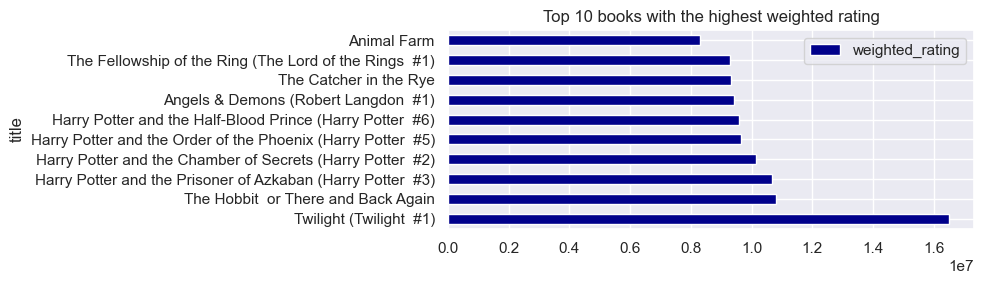

In [539]:
#show the top 10 books with the highest weighted rating and plot the results in a horizontal bar chart
df1[['title', 'weighted_rating']].sort_values('weighted_rating', ascending=False).nlargest(10, 'weighted_rating').plot(kind='barh', x='title', y='weighted_rating', color='darkblue',figsize=(10,3), 
title='Top 10 books with the highest weighted rating')

<AxesSubplot:title={'center':'Top 10 authors having produced the most books'}, ylabel='author'>

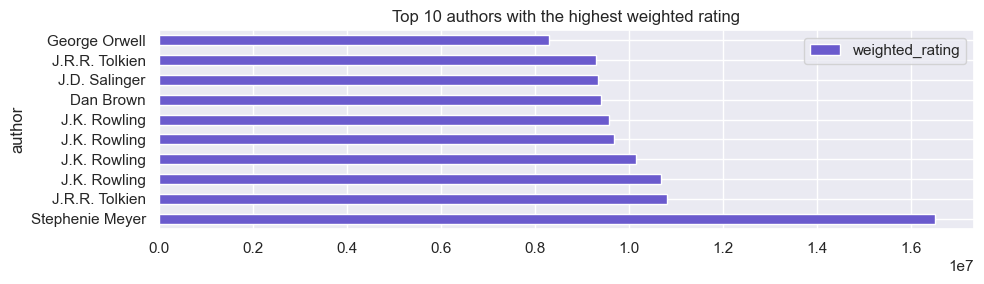

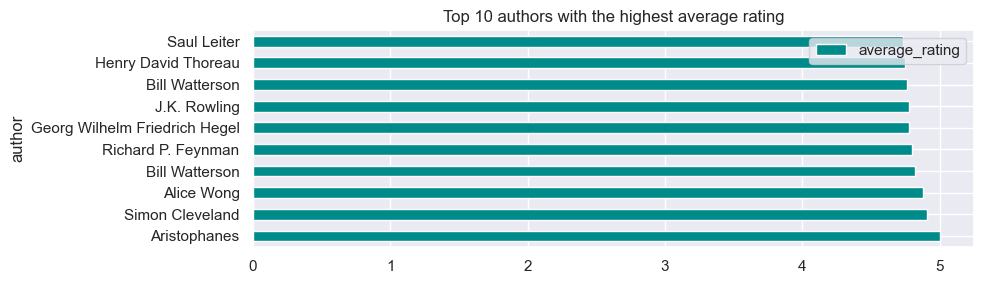

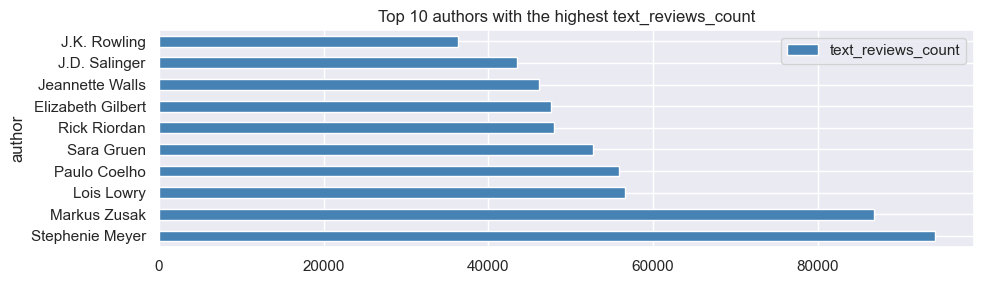

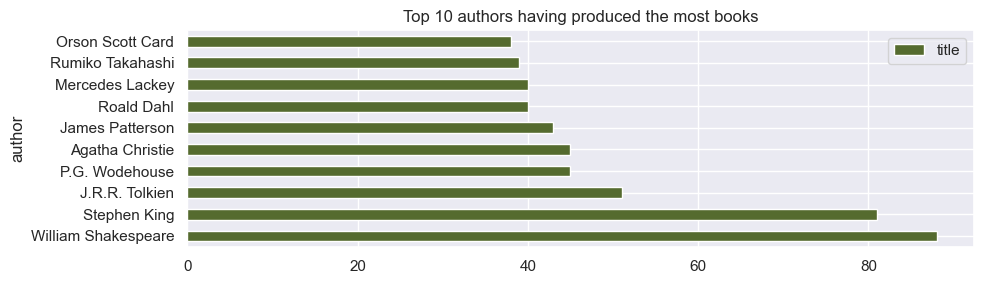

In [540]:
#show the top 10 authors unique values with the highest weighted rating and plot the results in a horizontal bar chart
df1[['author', 'weighted_rating']].sort_values('weighted_rating', ascending=False).nlargest(10, 'weighted_rating').plot(kind='barh', x='author', y='weighted_rating',color='slateblue',figsize=(10,3), title='Top 10 authors with the highest weighted rating')

#show the top 10 authors with the highest average rating and plot the results in a horizontal bar chart
df1[['author', 'average_rating']].sort_values('average_rating', ascending=False).nlargest(10, 'average_rating').plot(kind='barh', x='author', y='average_rating', color='darkcyan',figsize=(10,3), title='Top 10 authors with the highest average rating')
#show the top 10 authors with the highest text_reviews_count and plot the results in a horizontal bar chart
df1[['author', 'text_reviews_count']].sort_values('text_reviews_count', ascending=False).nlargest(10, 'text_reviews_count').plot(kind='barh', x='author', y='text_reviews_count', color='steelblue',figsize=(10,3), title='Top 10 authors with the highest text_reviews_count')


#show the top 10 authors having produced the most books  and plot the results in a horizontal bar chart
df1[['author', 'title']].groupby('author').count().sort_values('title', ascending=False).nlargest(10, 'title').plot(kind='barh',color='darkolivegreen', figsize=(10,3), title='Top 10 authors having produced the most books')


<AxesSubplot:title={'center':'Top 10 publishers with the highest text_reviews_count'}, ylabel='publisher'>

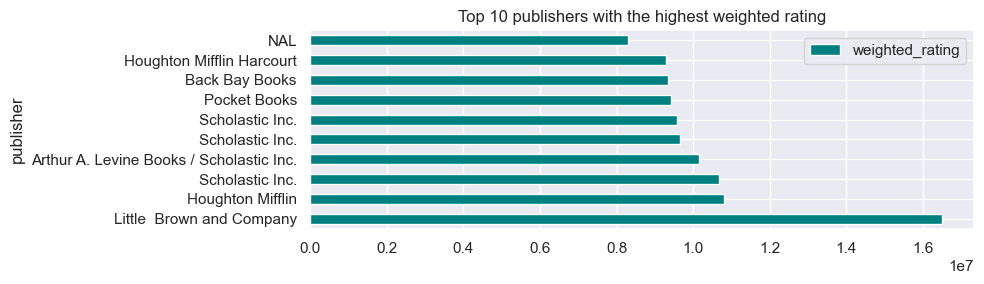

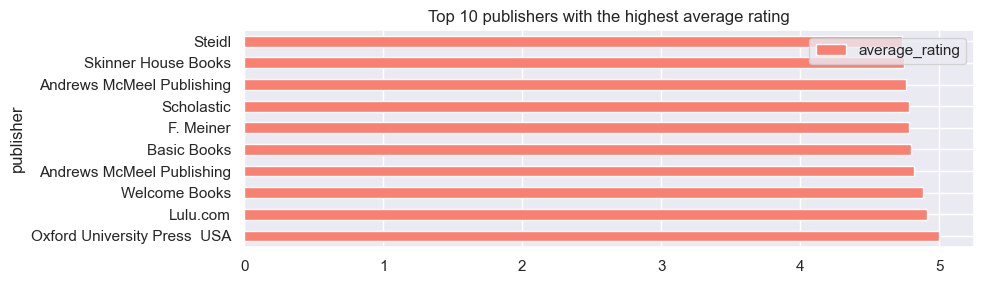

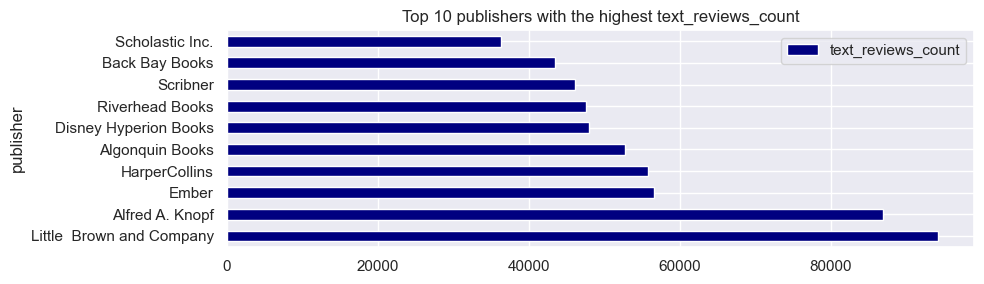

In [541]:
#group by  the top 10 publisher unique values with the highest weighted rating and plot the results in a horizontal bar chart
df1[['publisher', 'weighted_rating']].sort_values('weighted_rating', ascending=False).nlargest(10, 'weighted_rating').plot(kind='barh', x='publisher', y='weighted_rating', color='teal',figsize=(10,3), title='Top 10 publishers with the highest weighted rating')
#show the top 10 publisher with the highest average rating and plot the results in a horizontal bar chart
df1[['publisher', 'average_rating']].sort_values('average_rating', ascending=False).nlargest(10, 'average_rating').plot(kind='barh', x='publisher', y='average_rating',color='salmon', figsize=(10,3), title='Top 10 publishers with the highest average rating')
#show the top 10 publisher with the highest text_reviews_count and plot the results in a horizontal bar chart
df1[['publisher', 'text_reviews_count']].sort_values('text_reviews_count', ascending=False).nlargest(10, 'text_reviews_count').plot(kind='barh', x='publisher', y='text_reviews_count', color='navy',figsize=(10,3), title='Top 10 publishers with the highest text_reviews_count')


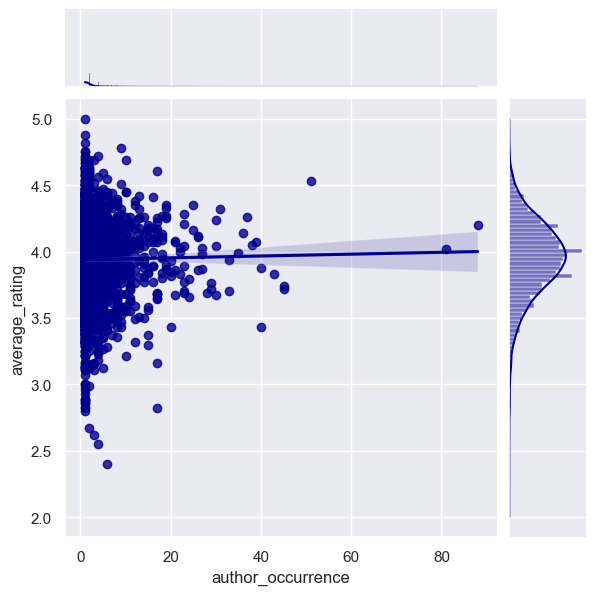

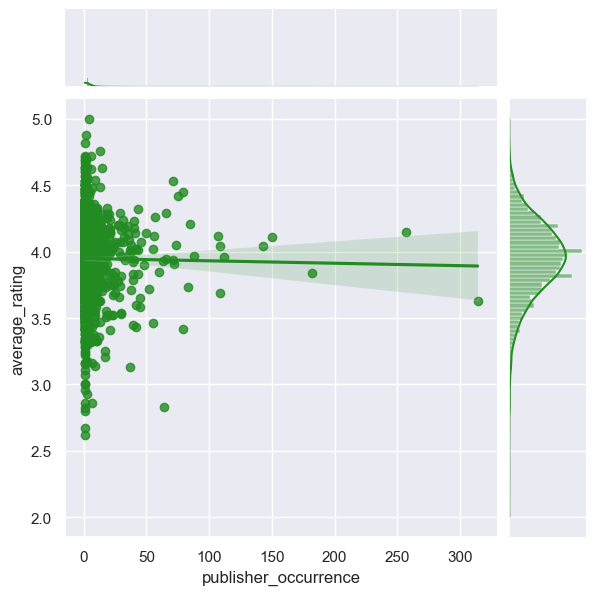

In [571]:
#show the correlation between the author occurence and the average rating
sns.jointplot(x='author_occurrence', y='average_rating', data=df1, kind='reg', color='darkblue')

#show the correlation between the publisher occurence and the average rating
sns.jointplot(x='publisher_occurrence', y='average_rating', data=df1, kind='reg', color='forestgreen')

In [574]:
#plot the average rating per categories as tree map 
fig = px.treemap(df1, path=['categories'], values='average_rating', color='average_rating', color_continuous_scale='RdBu')
fig.update_layout(title_text='Average rating per categories')

Text(0.5, 1.0, 'Mean of the average rating per language')

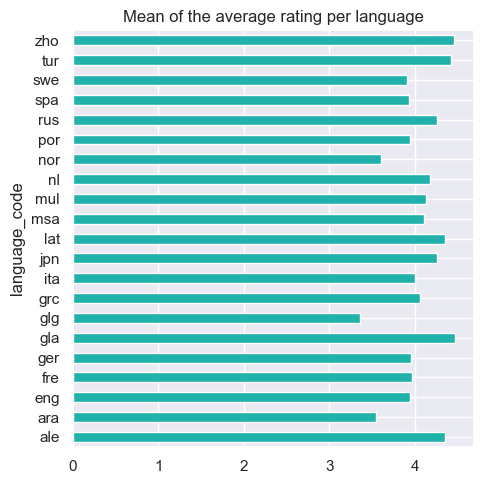

In [544]:
#mean of  the averating rating per language and plot the results in a horizontal bar chart
df1.groupby('language_code')['average_rating'].mean().plot(kind='barh', figsize=(5,5), color='lightseagreen')
plt.title('Mean of the average rating per language')

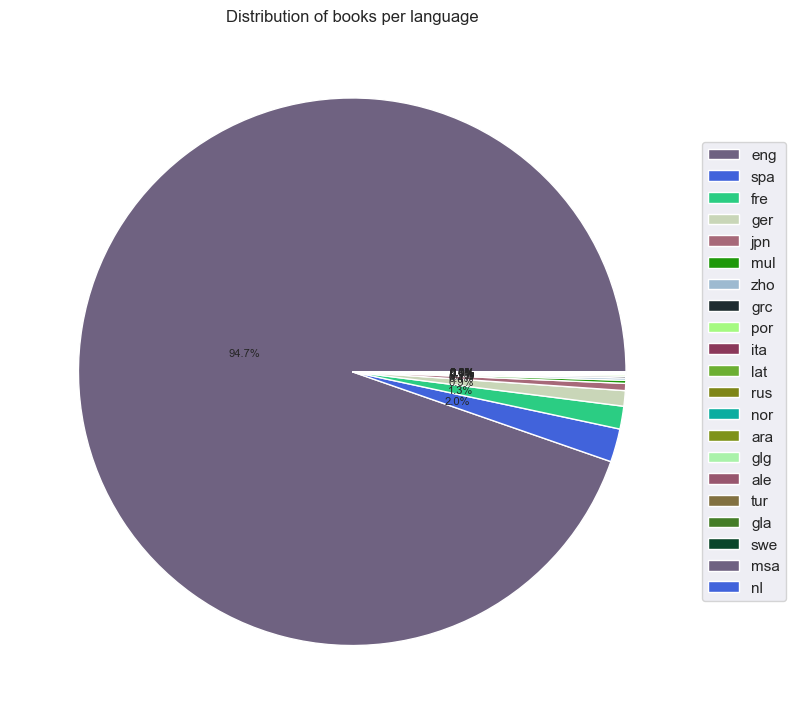

In [583]:
#show the number of books per language and plot the results in a pie chart
import random


plt.rcParams["figure.figsize"] = [8, 19]
plt.rcParams["figure.autolayout"] = True

n = 19
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]
a = df1['language_code'].value_counts().values
f = plt.figure()
ax = f.add_subplot(111, aspect='equal')
p = plt.pie(a, colors=color)
#add percentage
plt.pie(a, colors=color,autopct='%1.1f%%', pctdistance=0.4)
#add legend
plt.legend(p[0], df1['language_code'].value_counts().index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
#add title
plt.title('Distribution of books per language')

plt.show()

In [546]:

#scatterplot average rating above 3 and publication year above 2000, size of the point is the weighted rating and color is the language_code, hover name is categories
fig = px.scatter(df1[df1.average_rating>3][df1.publi_year>2000], x="average_rating", y="publi_year", size="weighted_rating", color="language_code", hover_name="categories", log_x=True, size_max=60)

fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_148508\4200970540.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

